#### An excercise for mastering SVM using sklearn.
#### Firstly I will look for the best Hyperparameter for γ and C

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC

In [169]:
# Load Iris dataset.
iris = load_iris()

In [170]:
# Store observations.
X = iris.data
y = iris.target

In [171]:
# Get number of samples and features in dataset.
num_samples, num_features = X.shape
num_samples, num_features

(150, 4)

In [172]:
# Compute number of samples for training
# The floor division // rounds the result down to the nearest whole number
num_train = num_samples * 70 // 100
num_train

105

In [173]:
# Compute number of samples for testing
num_test = num_samples - num_train
num_test

45

In [174]:
# Compute random ordering
indices = np.random.permutation(num_samples)

In [175]:
# Define training set
X_train = X[indices[:num_train]]
y_train = y[indices[:num_train]]
y_train

array([2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2,
       0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0,
       1, 0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 2, 2, 1, 0, 1,
       0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2,
       1, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2])

In [176]:
# Define testing set
X_test = X[indices[num_train:]]
y_test = y[indices[num_train:]]
y_test

array([2, 1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 1,
       0, 2, 2, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 1, 0,
       1])

#### We have to find the best hyperparameter C and γ for our dataset.

In [177]:
# Set number of folders.
num_folds = 5

In [178]:
# Define values for regularization.
choices_C = [0.001, 0.01, 0.1, 1, 10]

In [179]:
# Define values for kernel coefficient.
choices_g = [0.001, 0.1, 1, 10]

In [180]:
# Create matrix to store validation results.
results = np.empty((len(choices_C), len(choices_g)))
results.shape

(5, 4)

In [181]:
# Partition training set
X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

In [182]:
# Perform grid search over hyperparameters.
for i, C in enumerate(choices_C):
    for j, g in enumerate(choices_g):
         # Create array to stoe intermediate results.
        accuracies = np.empty(num_folds)

        # Cross validate hyperparameter setting.
        for k in range(num_folds):

            # Use current fold for validation
            X_val = X_train_folds[k]
            y_val = y_train_folds[k]

            # Use remaining folds as training set.
            X_train_concat = np.concatenate(
                X_train_folds[:k] + X_train_folds[k+1:]
            )

            y_train_concat = np.concatenate(
                y_train_folds[:k] + y_train_folds[k+1:]
            )

            # Create support vector classifier
            model = SVC(C=C, gamma=g)
 
            # Fit the model to training data.
            model.fit(X_train_concat, y_train_concat)

            # Compute and store accuracy.
            accuracies[k] = model.score(X_val, y_val)

        # compute mean accuracy.
        results[i, j] = np.mean(accuracies)

# Get indices of best values.
# np.argmax: the index of the maximum number
i, j = np.unravel_index(np.argmax(results), (results.shape))

# Save best hyperparameter values.
best_C = choices_C[i]
best_g = choices_g[j]

# Show hyperparameter values.
print(f"Best values are C={best_C} and gamma = {best_g}")
            

Best values are C=10 and gamma = 0.1


In [183]:
# Set number of digits.
np.set_printoptions(precision=2)

In [184]:
print(results*100)

[[38.1  38.1  38.1  34.29]
 [38.1  38.1  38.1  34.29]
 [38.1  80.95 93.33 34.29]
 [70.48 95.24 96.19 93.33]
 [89.52 97.14 94.29 93.33]]


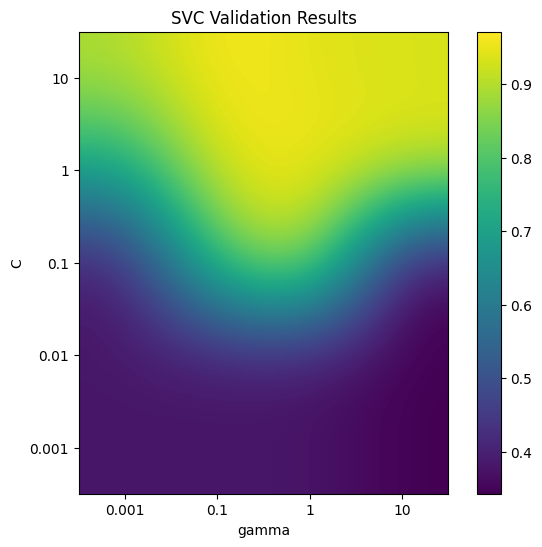

In [185]:
# Create figure.
plt.figure(figsize=(7.5, 6))

# Set titel and axis labels
plt.title("SVC Validation Results")
plt.xlabel("gamma")
plt.ylabel("C")

# Reverse order of entries
# axis = 0 rows reverse
results = np.flip(results, axis=0) 
choices_C.reverse()

# Don't show ticks.
# Ticks: Ein Array von Positionen, an denen die Ticks platziert werden sollen.
# Labels: Ein Array von Beschriftungen für die Ticks.
plt.xticks(ticks=np.arange(len(choices_g)), labels=choices_g)
plt.yticks(ticks=np.arange(len(choices_C)), labels=choices_C)

# Show accuracies as heat map.
plt.colorbar(
    plt.imshow(results, cmap="viridis", interpolation="bicubic"),
    ax=plt.gca()
)
plt.show()

#### Finally we retrain the model on the complete training set, unsing the chose values
#### the two hyperparameters and report the accuracy on the test set.

In [186]:
# Create model with the best hyperparameter values.
model = SVC(C=best_C, gamma=best_g)

# Fit the model to complete training data.
model.fit(X_train, y_train)

# Compute the accuracy.
accuracy = model.score(X_test, y_test)

# Show result.
print(f"Test accuracy is: {accuracy * 100:.2f} %")

Test accuracy is: 97.78 %
